### DEMSLV05

# Cournot Equilibrium Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from compecon import NLP, gridmake
from compecon.demos import demo
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Parameters and initial value

In [2]:
alpha = 0.625
beta = np.array([0.6, 0.8])

### Set up the Cournot function

In [3]:
def market(q):
    quantity = q.sum()
    price = quantity ** (-alpha)
    return price, quantity

In [4]:
def cournot(q):
    P, Q = market(q)
    P1 = -alpha * P/Q
    P2 = (-alpha - 1) * P1 / Q
    fval = P + (P1 - beta) * q
    fjac = np.diag(2 * P1 + P2 * q - beta) + np.fliplr(np.diag(P1 + P2 * q))
    return fval, fjac

### Compute equilibrium using Newton method (explicitly)

In [5]:
q = np.array([0.2, 0.2])

for it in range(40):
    f, J = cournot(q)
    step = -np.linalg.solve(J, f)
    q += step
    if np.linalg.norm(step) < 1.e-10: break

price, quantity = market(q)
print(f'Company 1 produces {q[0]:.4f} units, while company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')

Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


### Using a NLP object

In [11]:
q0 = np.array([0.2, 0.2])
cournot_problem = NLP(cournot)
q = cournot_problem.newton(q0, print=True)

price, quantity = market(q)
print(f'\nCompany 1 produces {q[0]:.4f} units, while company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')

Solving nonlinear equations by Newton's method
it    bstep  change
--------------------
   0     0  4.64e-01
   1     0  9.53e-02
   2     0  3.47e-03
   3     0  4.20e-06
   4     0  5.77e-12

Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


### Generate data for contour plot

In [7]:
n = 100
q1 = np.linspace(0.1, 1.5, n)
q2 = np.linspace(0.1, 1.5, n)
z = np.array([cournot(q)[0] for q in gridmake(q1, q2).T]).T

### Plot figures

Solving nonlinear equations by Newton's method
it    bstep  change
--------------------
   0     0  1.10e+00
   1     0  4.64e-01
   2     0  9.53e-02
   3     0  3.47e-03
   4     0  4.20e-06
Solving nonlinear equations by Broyden's method
it    bstep  change
--------------------
   0     0  4.64e-01
   1     0  2.17e-01
   2     0  5.45e-02
   3     0  1.53e-02
   4     0  1.04e-02
   5     0  4.55e-03
   6     0  1.33e-04
   7     0  2.94e-07
   8     0  1.34e-09


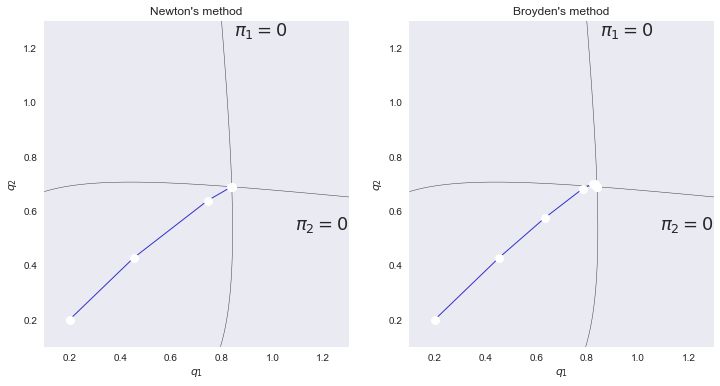

In [8]:
steps_options = {'marker': 'o',
                 'color': (0.2, 0.2, .81),
                 'linewidth': 1.0,
                 'markersize': 9,
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'red'}

contour_options = {'levels': [0.0],
                   'colors': '0.25',
                   'linewidths': 0.5}


Q1, Q2 = np.meshgrid(q1, q2)
Z0 = np.reshape(z[0], (n,n), order='F')
Z1 = np.reshape(z[1], (n,n), order='F')

methods = ['newton', 'broyden']
cournot_problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True

qmin, qmax = 0.1, 1.3

plt.figure(figsize=[12,6])
for it, method in enumerate(methods):
    x = cournot_problem.zero(method=method)
    demo.subplot(1, 2, it + 1, methods[it].capitalize() + "'s method",
                 '$q_1$', '$q_2$', [qmin, qmax], [qmin, qmax])
    plt.contour(Q1, Q2, Z0, **contour_options)
    plt.contour(Q1, Q2, Z1, **contour_options)
    plt.plot(*cournot_problem.x_sequence, **steps_options)

    demo.text(0.85, qmax, '$\pi_1 = 0$', 'left', 'top')
    demo.text(qmax, 0.55, '$\pi_2 = 0$', 'right', 'center')
plt.show()

Solving nonlinear equations by Newton's method
it    bstep  change
--------------------
   0     0  1.10e+00
   1     0  4.64e-01
   2     0  9.53e-02
   3     0  3.47e-03
   4     0  4.20e-06


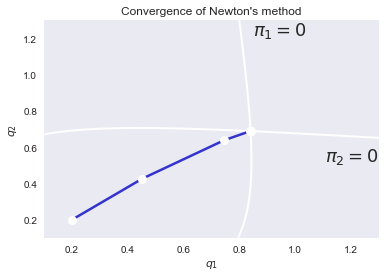

In [9]:
steps_options = {'marker': 'o',
                 'color': (0.2, 0.2, .81),
                 'linewidth': 2.5,
                 'markersize': 9,
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'red'}

contour_options = {'levels': [0.0],
                   'colors': 'white',
                   'linewidths': 2.0}


Q1, Q2 = np.meshgrid(q1, q2)
Z0 = np.reshape(z[0], (n,n), order='F')
Z1 = np.reshape(z[1], (n,n), order='F')

methods = ['newton', 'broyden']
cournot_problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True

qmin, qmax = 0.1, 1.3

plt.figure(figsize=[12,12])

x = cournot_problem.zero(method='newton')
demo.figure("Convergence of Newton's method", '$q_1$', '$q_2$', [qmin, qmax], [qmin, qmax])
plt.contour(Q1, Q2, Z0, **contour_options)
plt.contour(Q1, Q2, Z1, **contour_options)

plt.plot(*cournot_problem.x_sequence, **steps_options)

demo.text(0.85, qmax, '$\pi_1 = 0$', 'left', 'top')
demo.text(qmax, 0.55, '$\pi_2 = 0$', 'right', 'center')

plt.savefig('c:/users/rromero/latex-aux/cournot.pdf',bbox_inches='tight')
plt.show()